# Scikit-Learn Tutorial Notebook

This notebook explores Scikit-Learn for machine learning tasks, including data preprocessing, model training, and evaluation using the Chicago Taxi dataset for regression.

## 1. Import Required Libraries

Import Scikit-Learn, NumPy, Pandas, and other necessary libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## 2. Load and Explore Dataset

Load a dataset using Scikit-Learn's datasets module and perform basic exploration.

In [5]:
# Load the Chicago Taxi dataset
df = pd.read_csv('../dataset/chicago_taxi_train.csv')

# Select features and target for regression (predicting fare)
features = ['TRIP_SECONDS', 'TRIP_MILES', 'PICKUP_COMMUNITY_AREA', 'DROPOFF_COMMUNITY_AREA']
target = 'FARE'

# Handle missing values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df[features + [target]].head())
print("\nFeature columns:", features)
print("Target column:", target)

Dataset shape: (26170, 18)

First 5 rows:
   TRIP_SECONDS  TRIP_MILES  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA  \
2          1173        1.29                   32.0                     8.0   
3          3360        3.70                   32.0                    24.0   
4          1044        1.15                   32.0                     8.0   
5          1251        1.38                    8.0                    28.0   
6          1813        2.00                    8.0                    28.0   

    FARE  
2  10.25  
3  23.75  
4  10.00  
5  11.00  
6  14.50  

Feature columns: ['TRIP_SECONDS', 'TRIP_MILES', 'PICKUP_COMMUNITY_AREA', 'DROPOFF_COMMUNITY_AREA']
Target column: FARE


## 3. Preprocess Data

Apply preprocessing techniques such as scaling, encoding, and handling missing values.

In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data mean:", X.mean(axis=0).values)
print("Scaled data mean:", X_scaled.mean(axis=0))
print("Scaled data std:", X_scaled.std(axis=0))

Original data mean: [1236.23247994    7.17876347   33.18731372   25.63129538]
Scaled data mean: [-1.02087913e-16  5.21299982e-17 -1.04259996e-16 -5.64741647e-17]
Scaled data std: [1. 1. 1. 1.]


## 4. Split Data into Training and Testing Sets

Use train_test_split to divide the data into training and testing sets.

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (18319, 4)
Testing set shape: (7851, 4)


## 5. Train a Machine Learning Model

Select and train a regression model from Scikit-Learn.

In [8]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model trained successfully!
Model coefficients: [ 2.64363249 12.96076522 -0.08510273  0.12047156]
Model intercept: 21.36989795147752


## 6. Make Predictions

Use the trained model to make predictions on the test set.

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions:", y_pred[:10])  # Show first 10 predictions
print("Actual values:", y_test[:10])

Predictions: [ 8.14727398 29.99732574  8.58589587 41.91755117 21.64125445 36.98058159
  9.38036646 19.42270008  6.23032708 14.23296342]
Actual values: 720       8.00
17245    30.00
8328      8.25
30869    43.00
14335    21.25
17445    37.25
8811      9.00
24434    19.00
3274      5.75
7533     13.00
Name: FARE, dtype: float64


## 7. Evaluate Model Performance

Calculate regression metrics like MSE and R² to evaluate the model.

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show some predictions
print("\nSample predictions:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")

Mean Squared Error: 10.42
R² Score: 0.96

Sample predictions:
Actual: 8.00, Predicted: 8.15
Actual: 30.00, Predicted: 30.00
Actual: 8.25, Predicted: 8.59
Actual: 43.00, Predicted: 41.92
Actual: 21.25, Predicted: 21.64


---

# Lesson Tutorial

This section follows the Scikit-Learn Tutorial from the lesson addendum, using synthetic data for linear regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Load the Chicago Taxi dataset
df = pd.read_csv('../dataset/chicago_taxi_train.csv')

# Select features and target (similar to synthetic data)
# Using TRIP_MILES as X and FARE as y for regression
df = df.dropna(subset=['TRIP_MILES', 'FARE'])
X = df['TRIP_MILES']
y = df['FARE']

In [16]:
# Convert X and y into a pandas DataFrame
df = pd.DataFrame({
    'X': X,
    'y': y
})

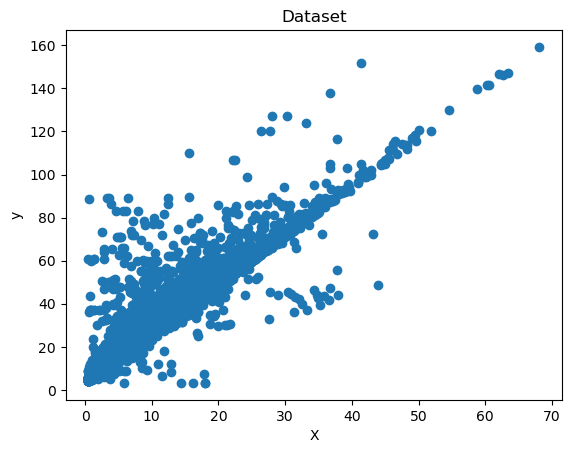

In [17]:
# It's often useful to visualize the data before building models.
plt.scatter(df['X'], df['y'])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2, random_state=0)
X_train = X_train.values.reshape(-1, 1)

In [19]:
X_test = X_test.values.reshape(-1, 1)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Use the model to make predictions on the test set.
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 14.477537112737576
R^2 Score: 0.9497058070457518


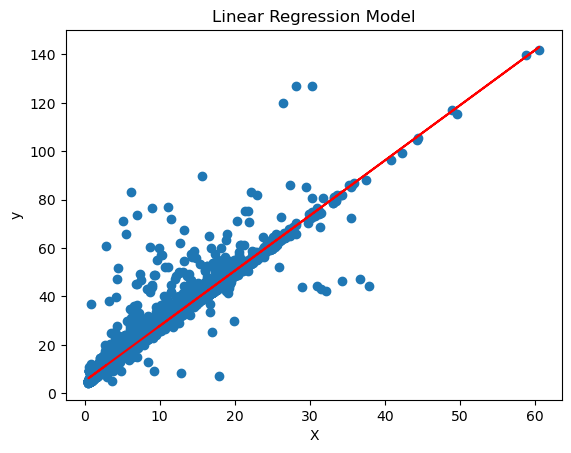

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()